# 6. Pandas Exercise: Solution

In [158]:
import pandas as pd
import numpy as np

import datetime as dt

In [293]:
%matplotlib inline

## 6.1. Watermarks


## 6.1.1 Watermarks: Manage the dataframe


Read the pickle "df_wt_text.pkl" in the data folder into a dataframe name df_wt_text

In [193]:
%ls ./data/exercise

df_wt_client.pkl  df_wt_text.pkl


In [194]:
df_wt_text = pd.read_pickle("./data/exercise/df_wt_text.pkl")
df_wt_text.shape

(254951, 22)

Subset the dataframe with the following columns

- ExecutionDate : Datetime : timestamp of the service response
- Client_Type : Category : Professional or Particular client
- ClientId : Integer : id for the client
- PropertyId : Integer : Ads property Id
- AgencyName : String : Name of the Agency (one-to-one with ClientId)
- Id : Integer : Image identifier
- Detected_Info : Dict : Response from the text detection service
- Url : String : URL of the image

Pick only the first 100 thousand registers for better performance

In [195]:
df_wt_text = df_wt_text[
    ['ExecutionDate','ClientId','Client_Type','PropertyId',
     'AgencyName','Id','Detected_Info','Url']].head(100000).copy()
df_wt_text.head()

,ExecutionDate,ClientId,Client_Type,PropertyId,AgencyName,Id,Detected_Info,Url
0,2020-03-17 05:30:02,900040000042,Profesional,20224813,BARIN,567029556,"[{'text': 'shotoNmIplte', 'centroid': [246, 83...",https://images.inmofactory.com/inmofactory/doc...
1,2020-03-17 05:30:02,9202762585543,Profesional,151261112,Haya Real Estate,567017990,"[{'text': '28', 'centroid': [715, 396], 'occup...",https://d.fotocasa.es/anuncio/2019/05/20/15126...
2,2020-03-17 05:30:02,9202762993528,Profesional,152298490,Haya Real Estate,567028234,[],https://d.fotocasa.es/anuncio/2019/08/07/15229...
3,2020-03-17 05:30:02,9202762585543,Profesional,151582418,Haya Real Estate,567018766,[],https://d.fotocasa.es/anuncio/2019/06/12/15158...
4,2020-03-17 05:30:02,9202753963841,Profesional,154417275,Haya Real Estate,567017338,"[{'text': 'soamnt', 'centroid': [1096, 691], '...",https://d.fotocasa.es/anuncio/2020/02/03/15441...


Rename the column 'Id' to 'ImageId'

In [336]:
df_wt_text.rename(columns={'Id': 'ImageId'}, inplace=True)
df_wt_text.columns

Index(['ExecutionDate', 'ClientId', 'Client_Type', 'PropertyId', 'AgencyName',
       'ImageId', 'Url', 'Date', 'Hour'],
      dtype='object')

Filter images where there is not Detected_Info and keep only the ones that have

In [211]:
df_wt_text['Detected_Info_Len'] = \
    df_wt_text.Detected_Info.apply(lambda x : len(x))

df_wt_text['Is_Detected_Info'] = \
    df_wt_text.Detected_Info_Len.apply(
        lambda x : "CON_TEXTO" if x > 0 else "SIN_TEXTO")

df_wt_text = \
    df_wt_text[df_wt_text.Is_Detected_Info == "CON_TEXTO"].copy()

df_wt_text = \
    df_wt_text[list(df_wt_text.columns[:-2])].copy()

df_wt_text.head()

,ExecutionDate,ClientId,Client_Type,PropertyId,AgencyName,ImageId,Detected_Info,Url
0,2020-03-17 05:30:02,900040000042,Profesional,20224813,BARIN,567029556,"[{'text': 'shotoNmIplte', 'centroid': [246, 83...",https://images.inmofactory.com/inmofactory/doc...
1,2020-03-17 05:30:02,9202762585543,Profesional,151261112,Haya Real Estate,567017990,"[{'text': '28', 'centroid': [715, 396], 'occup...",https://d.fotocasa.es/anuncio/2019/05/20/15126...
4,2020-03-17 05:30:02,9202753963841,Profesional,154417275,Haya Real Estate,567017338,"[{'text': 'soamnt', 'centroid': [1096, 691], '...",https://d.fotocasa.es/anuncio/2020/02/03/15441...
6,2020-03-17 05:30:02,9202759449696,Profesional,20700195,ENGEL & VÖLKERS,567026132,"[{'text': 'GVOLKERS', 'centroid': [462, 212], ...",https://d.inmofactory.com/1/110618/20700195/29...
7,2020-03-17 05:30:02,9202753411770,Profesional,20234724,"VIVIZ COMERCIALIZADORA, S.L.",567030989,"[{'text': 'ViViz.', 'centroid': [517, 196], 'o...",https://d.inmofactory.com/1/87581/20234724/295...


Make sure that all data types are correct and transform them if you need

In [212]:
df_wt_text.dtypes

ExecutionDate    datetime64[ns]
ClientId                  int64
Client_Type            category
PropertyId                int64
AgencyName               string
ImageId                   int64
Detected_Info            object
Url                      string
dtype: object

In [213]:
df_wt_text.Client_Type = \
    df_wt_text.Client_Type.astype('category')

df_wt_text.PropertyId = \
    df_wt_text.PropertyId.astype('int')

df_wt_text.AgencyName = \
    df_wt_text.AgencyName.astype('string')

df_wt_text.Url = \
    df_wt_text.Url.astype('string')

df_wt_text.dtypes

ExecutionDate    datetime64[ns]
ClientId                  int64
Client_Type            category
PropertyId                int64
AgencyName               string
ImageId                   int64
Detected_Info            object
Url                      string
dtype: object

Extract Date as 'yyyy-mm-dd' and Hour as 'MM:SS' from ExecutionDate

In [214]:
df_wt_text['Date'] = \
    df_wt_text.ExecutionDate.apply(
        lambda x : dt.datetime.strftime(x,'%Y-%m-%d')).astype(str)

In [215]:
df_wt_text['Hour'] = \
    df_wt_text.ExecutionDate.apply(
        lambda x : dt.datetime.strftime(x,'%H')).astype(str)

Parse Information provided by the text detection service 'Detected_Info' and convert it into columns.

You want an entry for each text: p.e. ImageId, text, centroid_x, centroid_y...

```
[{
   'text': '28',
   'centroid': [715, 396],
   'occupancy': 0.0017183883101851852,
   'string_category': 'numbers',
   'probability': 0.9938117861747742
 },
 {
   'text': '28',
   'centroid': [715, 396],
   'occupancy': 0.0017183883101851852,
   'string_category': 'numbers',
   'probability': 0.9938117861747742
 }] 
```

Store the results into a dataframe called "df_wt_info_res"

note: in the process transform the text to lowercase

In [233]:
df_wt_info_res = \
    df_wt_info.Detected_Info.apply(pd.Series) \
        .merge(df_wt_text[['ImageId','Detected_Info']], 
            left_index = True, 
            right_index = True) \
       .drop(["Detected_Info"], axis = 1) \
       .melt(id_vars = ['ImageId'], 
            value_name = "Detected_Info") \
       .dropna()[['ImageId','Detected_Info']]

In [236]:
df_wt_info_res['text'] = \
    df_wt_info_res.Detected_Info.apply(
        lambda x : x['text'].lower())

df_wt_info_res['string_category'] = \
    df_wt_info_res.Detected_Info.apply(
        lambda x : x['string_category'])

df_wt_info_res['occupancy'] = \
    df_wt_info_res.Detected_Info.apply(
        lambda x : x['occupancy'])

df_wt_info_res['probability'] = \
    df_wt_info_res.Detected_Info.apply(
        lambda x : x['probability'])

df_wt_info_res['centroid'] = \
    df_wt_info_res.Detected_Info.apply(
        lambda x : x['centroid'])

In [237]:
df_wt_info_res.head()

,ImageId,Detected_Info,text,string_category,occupancy,probability,centroid
0,567029556,"{'text': 'shotoNmIplte', 'centroid': [246, 830...",shotonmiplte,letters,0.004013,3.653873e-04,"[246, 830]"
1,567017990,"{'text': '28', 'centroid': [715, 396], 'occupa...",28,numbers,0.001718,9.938118e-01,"[715, 396]"
2,567017338,"{'text': 'soamnt', 'centroid': [1096, 691], 'o...",soamnt,letters,0.024159,7.494296e-13,"[1096, 691]"
3,567026132,"{'text': 'GVOLKERS', 'centroid': [462, 212], '...",gvolkers,letters,0.058802,2.901020e-02,"[462, 212]"
4,567030989,"{'text': 'ViViz.', 'centroid': [517, 196], 'oc...",viviz.,letters,0.057358,2.030919e-02,"[517, 196]"


Explode the dataframe to convert centroid list into center_x and center_y columns

In [238]:
df_centroid = df_wt_info_res.centroid.apply(pd.Series).copy()
df_centroid.columns = ['center_x','center_y']
df_centroid.head(2)

,center_x,center_y
0,246,830
1,715,396


In [239]:
df_wt_info_res = pd.merge(
    df_wt_info_res, 
    df_centroid,
    how='left',
    left_index = True, 
    right_index = True)

df_wt_info_res.drop('centroid', axis=1, inplace=True)
df_wt_info_res.columns

Index(['ImageId', 'Detected_Info', 'text', 'string_category', 'occupancy',
       'probability', 'center_x', 'center_y'],
      dtype='object')

Merge the extracted data with the original dataframe into a dataframe named df

- df_wt_text : orginal data
- df_wt_info_res : extracted data

Eliminate the Detected_Info column, is no loger useful

In [240]:
df_wt_info_res.drop('Detected_Info', axis=1, inplace=True)
df_wt_text.drop('Detected_Info', axis=1, inplace=True)

In [241]:
df = pd.merge(
    df_wt_info_res,
    df_wt_text,
    how='left',
    on='ImageId'
)
df.shape

(73538, 15)

In [242]:
df.head()

,ImageId,text,string_category,occupancy,probability,center_x,center_y,ExecutionDate,ClientId,Client_Type,PropertyId,AgencyName,Url,Date,Hour
0,567029556,shotonmiplte,letters,0.004013,3.653873e-04,246,830,2020-03-17 05:30:02,900040000042,Profesional,20224813,BARIN,https://images.inmofactory.com/inmofactory/doc...,2020-03-17,05
1,567017990,28,numbers,0.001718,9.938118e-01,715,396,2020-03-17 05:30:02,9202762585543,Profesional,151261112,Haya Real Estate,https://d.fotocasa.es/anuncio/2019/05/20/15126...,2020-03-17,05
2,567017338,soamnt,letters,0.024159,7.494296e-13,1096,691,2020-03-17 05:30:02,9202753963841,Profesional,154417275,Haya Real Estate,https://d.fotocasa.es/anuncio/2020/02/03/15441...,2020-03-17,05
3,567026132,gvolkers,letters,0.058802,2.901020e-02,462,212,2020-03-17 05:30:02,9202759449696,Profesional,20700195,ENGEL & VÖLKERS,https://d.inmofactory.com/1/110618/20700195/29...,2020-03-17,05
4,567030989,viviz.,letters,0.057358,2.030919e-02,517,196,2020-03-17 05:30:02,9202753411770,Profesional,20234724,"VIVIZ COMERCIALIZADORA, S.L.",https://d.inmofactory.com/1/87581/20234724/295...,2020-03-17,05


## 6.1.2 Watermarks: Inspect the results

- Describe all the variables

- Calculate number of texts and unique images by string_category and client type
- Calculate number of texts and unique images by agency_name

- Calculate probability of text detection by string_category and client type per image (mean and std)

- Calculate occupancy by string_category per property (mean and std)

- Get the top 10 agencies with better probability on average (by agency_name)

- Get the top 10 text detected with better probability on average by string_category

- Describe all the variables

In [243]:
df.describe()

,ImageId,occupancy,probability,center_x,center_y,ClientId,PropertyId
count,7.353800e+04,73538.000000,73538.000000,73538.000000,73538.000000,7.353800e+04,7.353800e+04
mean,5.672523e+08,0.018192,0.325025,617.254277,468.037300,8.709122e+12,2.484870e+07
std,3.278903e+05,0.028361,0.357978,379.180281,309.057375,1.968005e+12,2.595083e+07
min,5.667797e+08,0.000446,0.000000,-63.000000,5.000000,0.000000e+00,4.262923e+06
25%,5.669993e+08,0.003653,0.008774,315.000000,241.000000,9.202753e+12,1.949296e+07
50%,5.671719e+08,0.007504,0.159648,597.000000,439.000000,9.202755e+12,2.069420e+07
75%,5.674778e+08,0.019034,0.610827,853.000000,613.000000,9.202760e+12,2.070946e+07
max,5.682332e+08,0.481280,0.999989,6842.000000,4391.000000,9.202764e+12,1.550677e+08


In [245]:
df.describe(include = ['O','category'])

,text,string_category,Client_Type,Date,Hour
count,73538,73538,73538,73538,73538
unique,34459,5,2,7,24
top,a,letters,Profesional,2020-03-17,18
freq,646,65238,72976,26698,5196


- Calculate number of texts and unique images by string_category and client type
- Calculate number of texts and unique images by agency_name

In [246]:
df1 = df[['string_category','Client_Type','ImageId']] \
    .groupby(['string_category','Client_Type']) \
    .agg(['count', pd.Series.nunique])['ImageId']
df1.columns = ['num_texts','num_images']
df1.unstack()

num_texts             num_images            
Client_Type     Particular Profesional Particular Profesional
string_category                                              
letters                403       64835        251       30852
mixed                   21        1239         19        1111
mostly letters          26        2088         21        1695
mostly numbers          38        1285         33        1069
numbers                 74        3529         68        2993

In [247]:
df2 = df[['AgencyName','ImageId']] \
    .groupby(['AgencyName']) \
    .agg(['count', pd.Series.nunique])['ImageId']
df2.columns = ['num_texts','num_images']
df2

,num_texts,num_images
AgencyName,,
CUATRO INMOBILIARIA,3,3
INMOBILIAIRIA VIVE CACERES,21,4
INMOBILIARIA ALBASUR LEVATE,32,19
INMOBILIARIA DEL MAR,15,5
LUXINMO REAL ESTATE,109,87
...,...,...
victor,11,2
wilson gomez,2,2
ÁLVAREZ SALMERÓN INMOBILIARIA,132,59


- Calculate probability of text detection by string_category and client type per image (mean and std)

In [255]:
df3 = df[['string_category','Client_Type','ImageId','probability']] \
    .groupby(['string_category','Client_Type','ImageId']) \
    .agg(['mean','std']).dropna()['probability']
df3

probability          
                                             mean       std
string_category Client_Type ImageId                        
letters         Particular  566782958    0.007078  0.011771
                            566785895    0.725764  0.474244
                            566786202    0.693921  0.509907
                            566786371    0.339355  0.168511
                            566787127    0.005648  0.007988
...                                           ...       ...
numbers         Profesional 568072385    0.000129  0.000138
                            568077823    0.998988  0.000965
                            568175054    0.649902  0.364692
                            568176642    0.001859  0.002322
                            568177493    0.000565  0.000761

[16793 rows x 2 columns]

- Calculate occupancy by string_category per property (mean and std)


In [256]:
df4 = df[['string_category','Client_Type','PropertyId','probability']] \
    .groupby(['string_category','Client_Type','PropertyId']) \
    .agg(['mean','std']).dropna()['probability']
df4

mean       std
string_category Client_Type PropertyId                    
letters         Particular  152034740   0.025059  0.039807
                            152401433   0.006971  0.011687
                            153937762   0.001900  0.002686
                            154618586   0.565162  0.413824
                            154641159   0.597403  0.410644
...                                          ...       ...
numbers         Profesional 155018703   0.919652  0.115474
                            155020730   0.746099  0.029633
                            155035727   0.150964  0.291664
                            155036683   0.989840  0.009907
                            155063343   0.983261  0.002873

[9576 rows x 2 columns]

- Get the top 10 agencies with better probability on average (by agency_name)

In [260]:
df5 = df[['AgencyName','probability']] \
    .groupby(['AgencyName']) \
    .mean() \
    .sort_values(by='probability', ascending=False)
df5.head(10)

,probability
AgencyName,
ARAGON GESTION,0.998672
MATAGALLS CONSULTING,0.998373
UNIPISO,0.997770
ELITE GESTION INMOBILIARIA,0.996981
BYB SERVICIOS INMOBILIARIOS,0.996287
PROPERTY OUTLET,0.995340
Nexonorte,0.993870
OCASIONCASA C/GERONA,0.993539
080 REAL ESTATE,0.991573


- Get the top 2 text with detected better probability on average by string_category

In [288]:
df6 = df[['text','string_category','probability']] \
    .groupby(['text','string_category']) \
    .mean().reset_index()

df7 = pd.DataFrame(
    df6.groupby(['string_category'])['probability'].nlargest(2)
).reset_index().set_index('level_1')
df7

df8 = pd.merge(
    df7,df6['text'],how='left',left_index=True, right_index=True
).reset_index().drop('level_1',axis=1)

df8.set_index('string_category')

,probability,text
string_category,,
letters,0.999846,equipada
letters,0.999821,ante
mixed,0.999530,t2
mixed,0.970303,gc-381
mostly letters,0.988500,planta-25-
mostly letters,0.987956,planta-3
mostly numbers,0.998671,10:29
mostly numbers,0.997736,12:43
numbers,0.999837,302


## 6.1.3 Watermarks: Detect "Idealista" keyword on images

Using a levenshtein method and a distance of 2

Hint: Create a method 'detect_idealista' where:
- given a word and a distance (in our case 2)
- checks if the word and "idealista" keyword have a distance less than equal to 2
- ...by applying the levenshtein method

Then calculate the following

- Proportion of images that contain the word idealista
- Calculate top 10 agencies with the most idealista images

In [124]:
import unidecode

def levenshtein(seq1, seq2):
    """
        # Levenshtein Distance Algorithm:
        # https://dzone.com/articles/the-levenshtein-algorithm-1
        # https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python
    """
    seq1 = seq1.lower() # We need to do this conversion, because this
    seq2 = seq2.lower() # algorithm is upper and lower case sensitive
    
    seq1 = unidecode.unidecode(seq1) # We transform strings with special characters to ASCII 
    seq2 = unidecode.unidecode(seq2) # We transform strings with special characters to ASCII 
    
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    return (matrix[size_x - 1, size_y - 1])

Detect Idealista text

In [125]:
def detect_idealista(word, dist):
    return (levenshtein(word, 'idealista') <= dist)

In [128]:
df['is_idealista'] = \
    df.text.apply(lambda x : detect_idealista(x, 2))

Proportion of images that contain the word idealista

In [130]:
df['is_idealista'].value_counts(normalize=True)

False    0.997785
True     0.002215
Name: is_idealista, dtype: float64

Calculate top 10 agencies with the most idealista images

In [144]:
dfi = df[['AgencyName','is_idealista']] \
    .groupby(['AgencyName']) \
    .sum() \
    .sort_values(by='is_idealista',ascending=False)
dfi.head(10)

,is_idealista
AgencyName,
MARGAMORA,157.0
MOLMAR GESTION INMOBILIARIA E,74.0
SG INMOBILIARIA,48.0
Ed Real Estate,44.0
RECAJ INMOBILIARIA,39.0
ADMINISTRACION DECASA,34.0
OUTLET DE VIVIENDAS,28.0
LAS MIL Y UNA CASAS,25.0
CG INMOBILIARIA,24.0


## 6.1.4 Watermarks: Visualize

- Plot the evolution of number of processed images per day (with title font 18)
- Plot the evolution of number of processed images per day and hour (x axis hours and a line for each day, title font 18)
- Plot the evolution of number of processed images per day and client_type (in two graphs on the same plot)

- Plot the average probability distribution of the probability text detected by client_type (hint: boxplot)
- Plot the average ocupancy distribution of the ocupancy text detected by string_category (on the same graph)

- Plot the top 25 agencies with better probability on average (by agency_name)

- Create a heatmap on how they correlate text_probability and occupancy

- Plot the evolution of number of processed images per day (with title font 18)


In [298]:
df_p1 = df[['Date','ImageId']].groupby('Date').nunique()[['ImageId']]

Text(0.5, 1.0, 'Number of processed images per day\n')

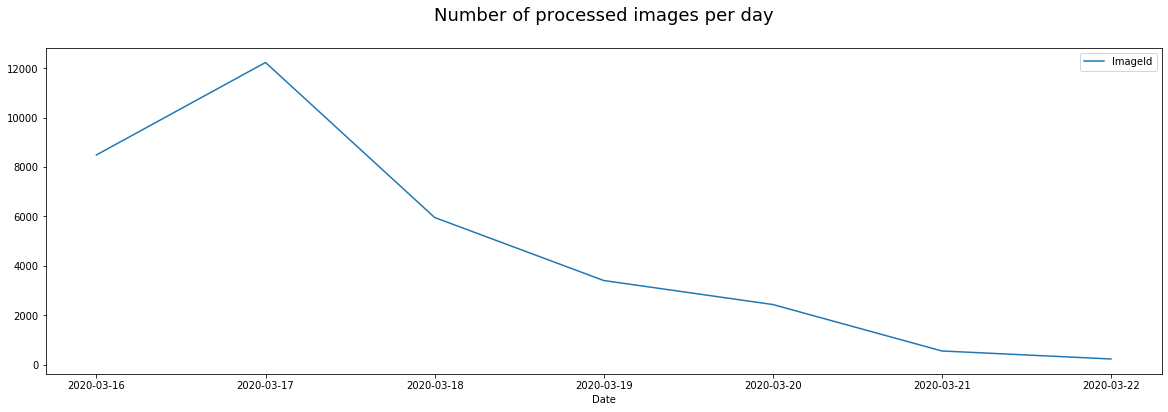

In [299]:
ax = df_p1.plot(figsize=(20,6))
ax.set_title("Number of processed images per day\n", fontsize=18)

- Plot the evolution of number of processed images per day and hour (x axis hours and a line for each day, title font 18)


In [301]:
df_p2 = df[['Date','Hour','ImageId']] \
    .groupby(['Date','Hour']).nunique()[['ImageId']]

Text(0.5, 1.0, 'Number of processed images per day and hour\n')

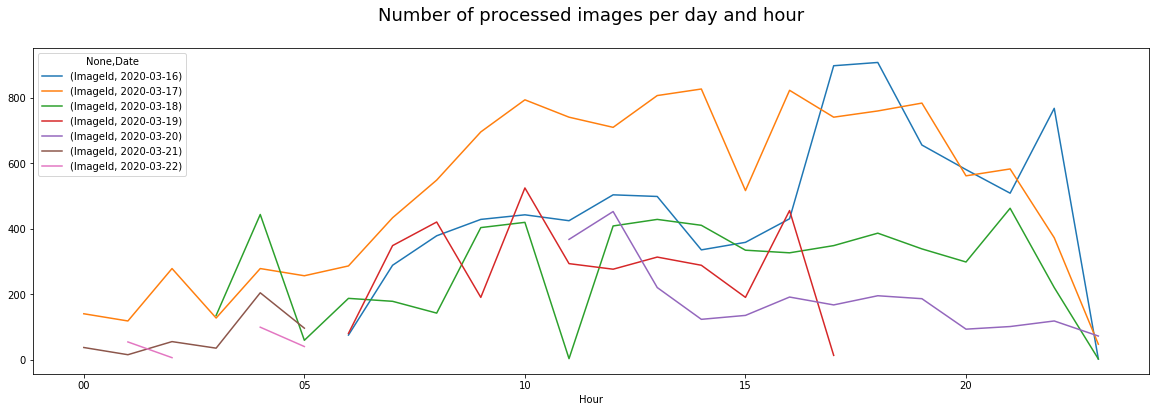

In [304]:
df_p2 = df[['Date','Hour','ImageId']] \
    .groupby(['Date','Hour']).nunique()[['ImageId']]

ax = df_p2.unstack(0).plot(figsize=(20,6))
ax.set_title("Number of processed images per day and hour\n", fontsize=18)

- Plot the evolution of number of processed images per day and client_type (in two graphs on the same plot)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff874462d10>,
      dtype=object)

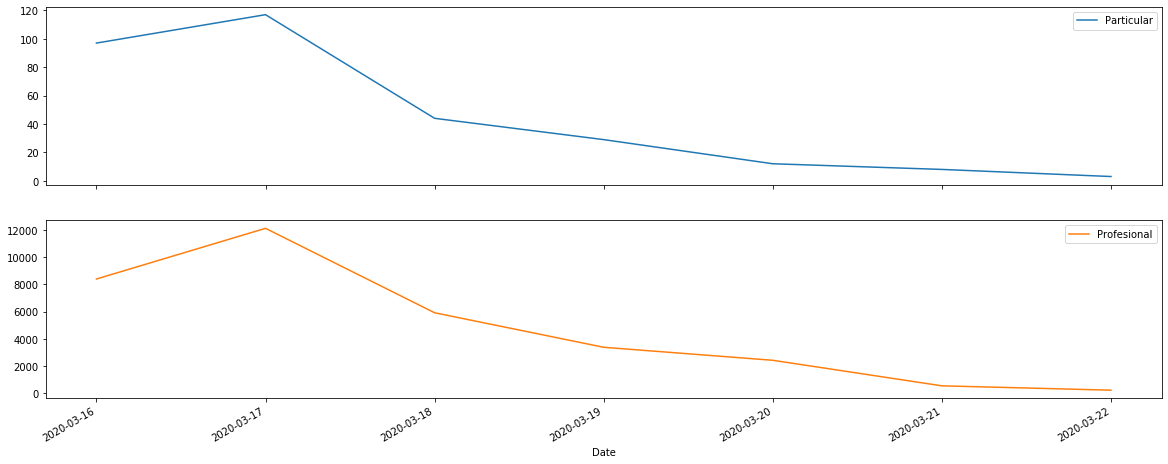

In [317]:
df_p3 = df[['Date','Client_Type','ImageId']] \
    .groupby(['Date','Client_Type']).nunique().unstack()['ImageId']

df_p3.plot(subplots=True, figsize=(20, 8))

- Plot the average probability distribution of the probability text detected by client_type (hint: boxplot)


Text(0.5, 1.0, 'Average probability distribution of the probability text detected by client_type')

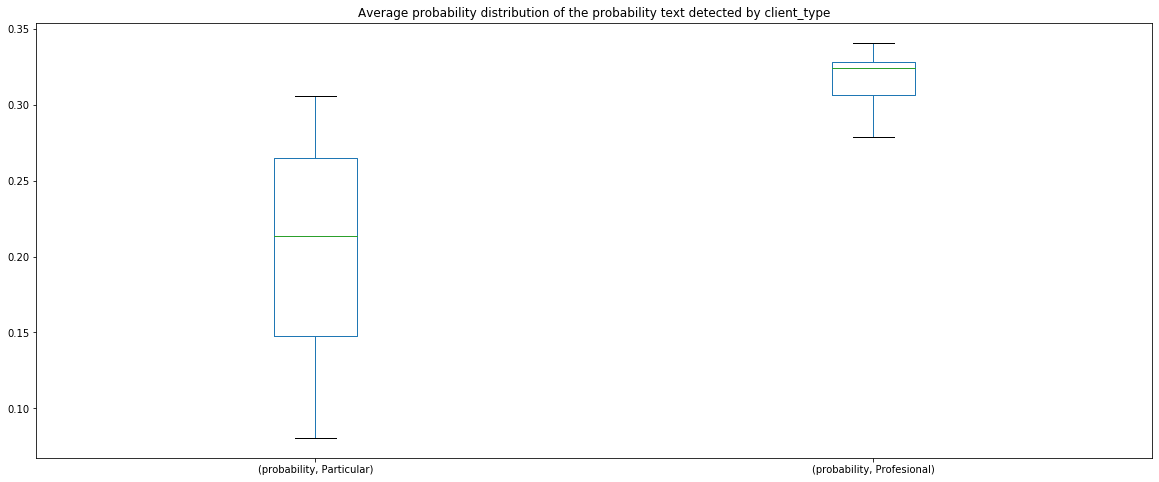

In [321]:
df_p4 = df[['Date','Client_Type','probability']] \
    .groupby(['Date','Client_Type']).mean().unstack()

ax = df_p4.plot.box(figsize=(20, 8))
ax.set_title(
    "Average probability distribution of the probability text detected by client_type")

- Plot the average ocupancy distribution of the occupancy text detected by string_category (on the same graph)



Text(0.5, 1.0, 'Average ocupancy distribution of the occupancy text detected by client_type')

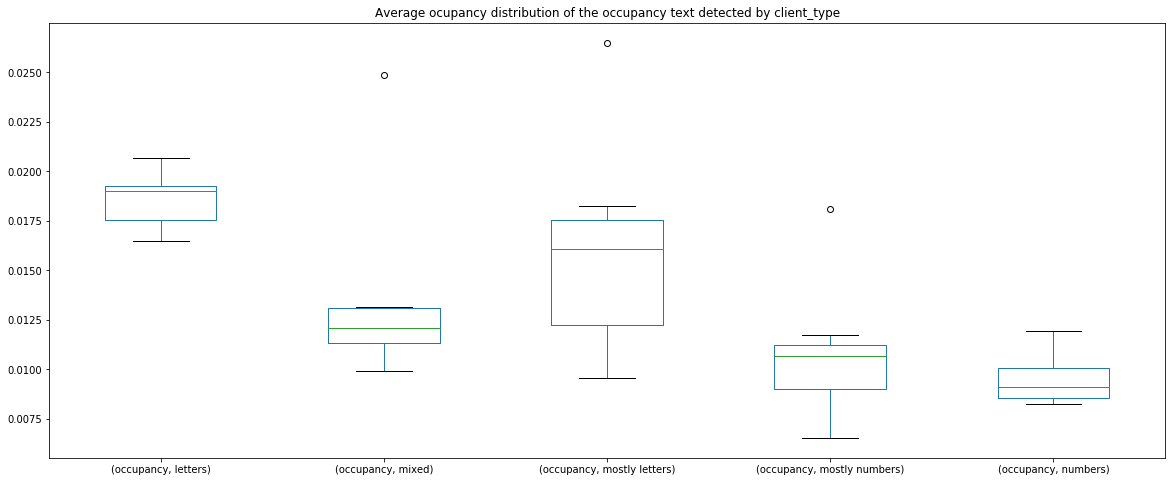

In [323]:
df_p5 = df[['Date','string_category','occupancy']] \
    .groupby(['Date','string_category']).mean().unstack()

ax = df_p5.plot.box(figsize=(20, 8))
ax.set_title(
    "Average ocupancy distribution of the occupancy text detected by client_type")

- Plot the top 25 agencies with better probability on average (by agency_name)


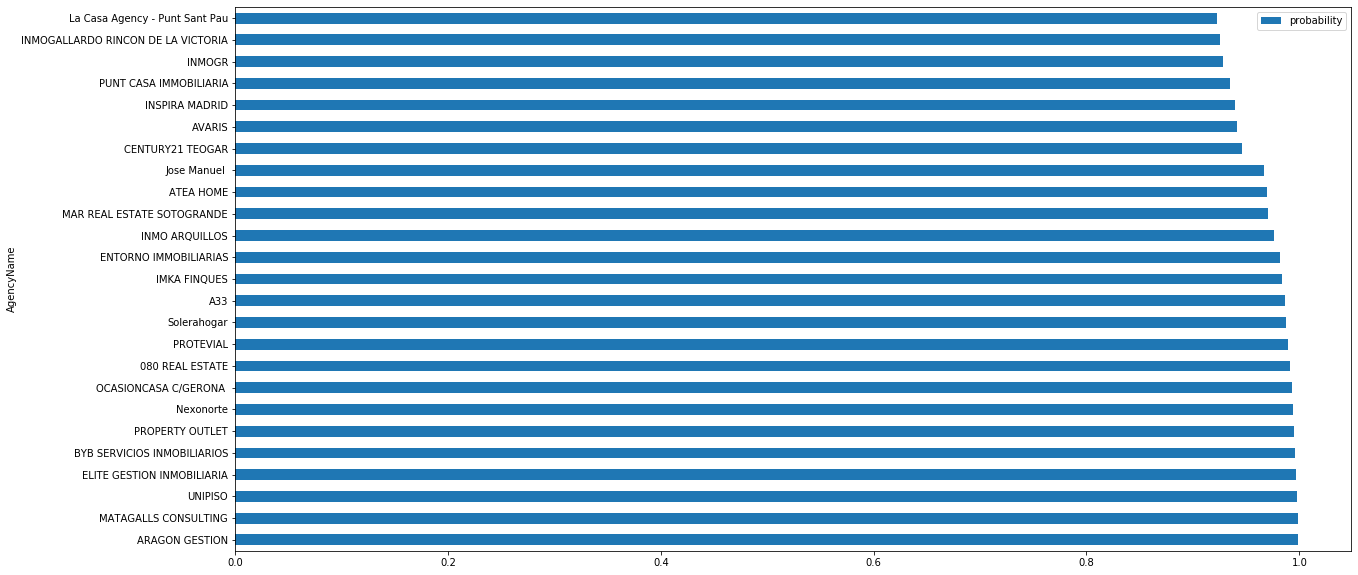

In [333]:
df_p6 = df[['AgencyName','probability']] \
    .groupby(['AgencyName']) \
    .mean() \
    .sort_values(by='probability', ascending=False)

df_p6.head(25).plot(kind='barh', figsize=(20,10))

- Create a heatmap on how they correlate text_probability, center_x, center_y and occupancy

In [332]:
import seaborn as sns

In [334]:
df_p7 = df[['probability','occupancy','center_x','center_y']].corr()
df_p7

,probability,occupancy,center_x,center_y
probability,1.000000,0.014877,-0.005091,-0.034487
occupancy,0.014877,1.000000,0.016689,-0.001756
center_x,-0.005091,0.016689,1.000000,0.398448
center_y,-0.034487,-0.001756,0.398448,1.000000


(4.0, 0.0)

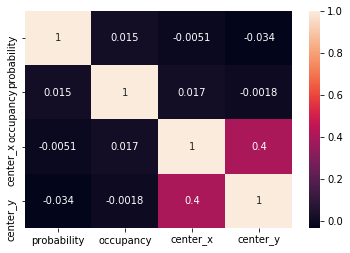

In [335]:
ax = sns.heatmap(df_p7, annot=True)
b, t = ax.get_ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
ax.set_ylim(b,t)